# Financial Analytics

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Financial Analytics data.csv')
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
454,495,Prime Focus,3031.50,609.61
455,496,Lak. Vilas Bank,3029.57,790.17
456,497,NOCIL,3026.26,249.27
457,498,Orient Cement,3024.32,511.53


In [3]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [4]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [5]:
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
dtype: object

### Description

In [11]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000,459.000000
mean,246.575163,28870.974139,3807.789412
std,146.046444,60557.081792,9989.449987
min,1.000000,3017.070000,0.000000
25%,117.500000,4942.815000,534.910000
50%,243.000000,10442.090000,1137.170000
75%,371.500000,24707.320000,2730.195000
max,499.000000,583436.720000,110666.930000


### EDA

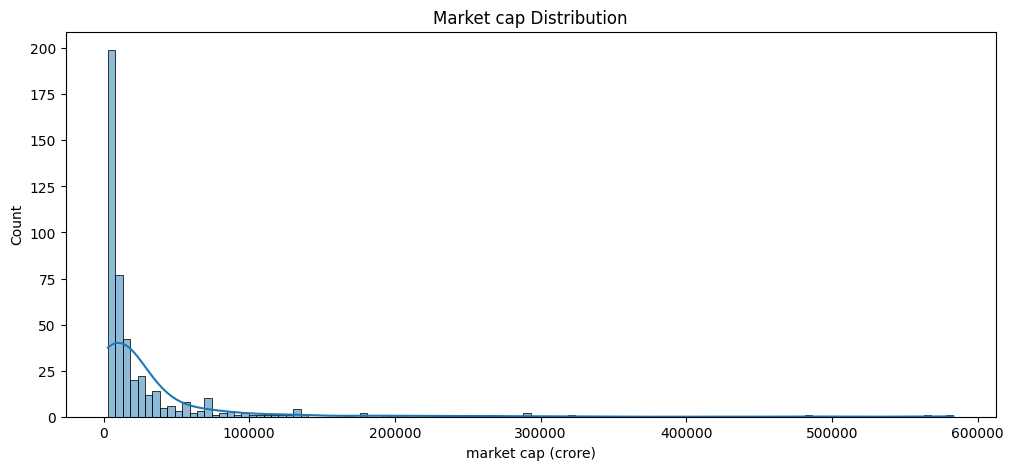

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(data=df['Mar Cap - Crore'],kde=True)
plt.title('Market cap Distribution')
plt.xlabel('market cap (crore)')
plt.show()

In [7]:
df2=df.head(100)
df2=df2.copy()

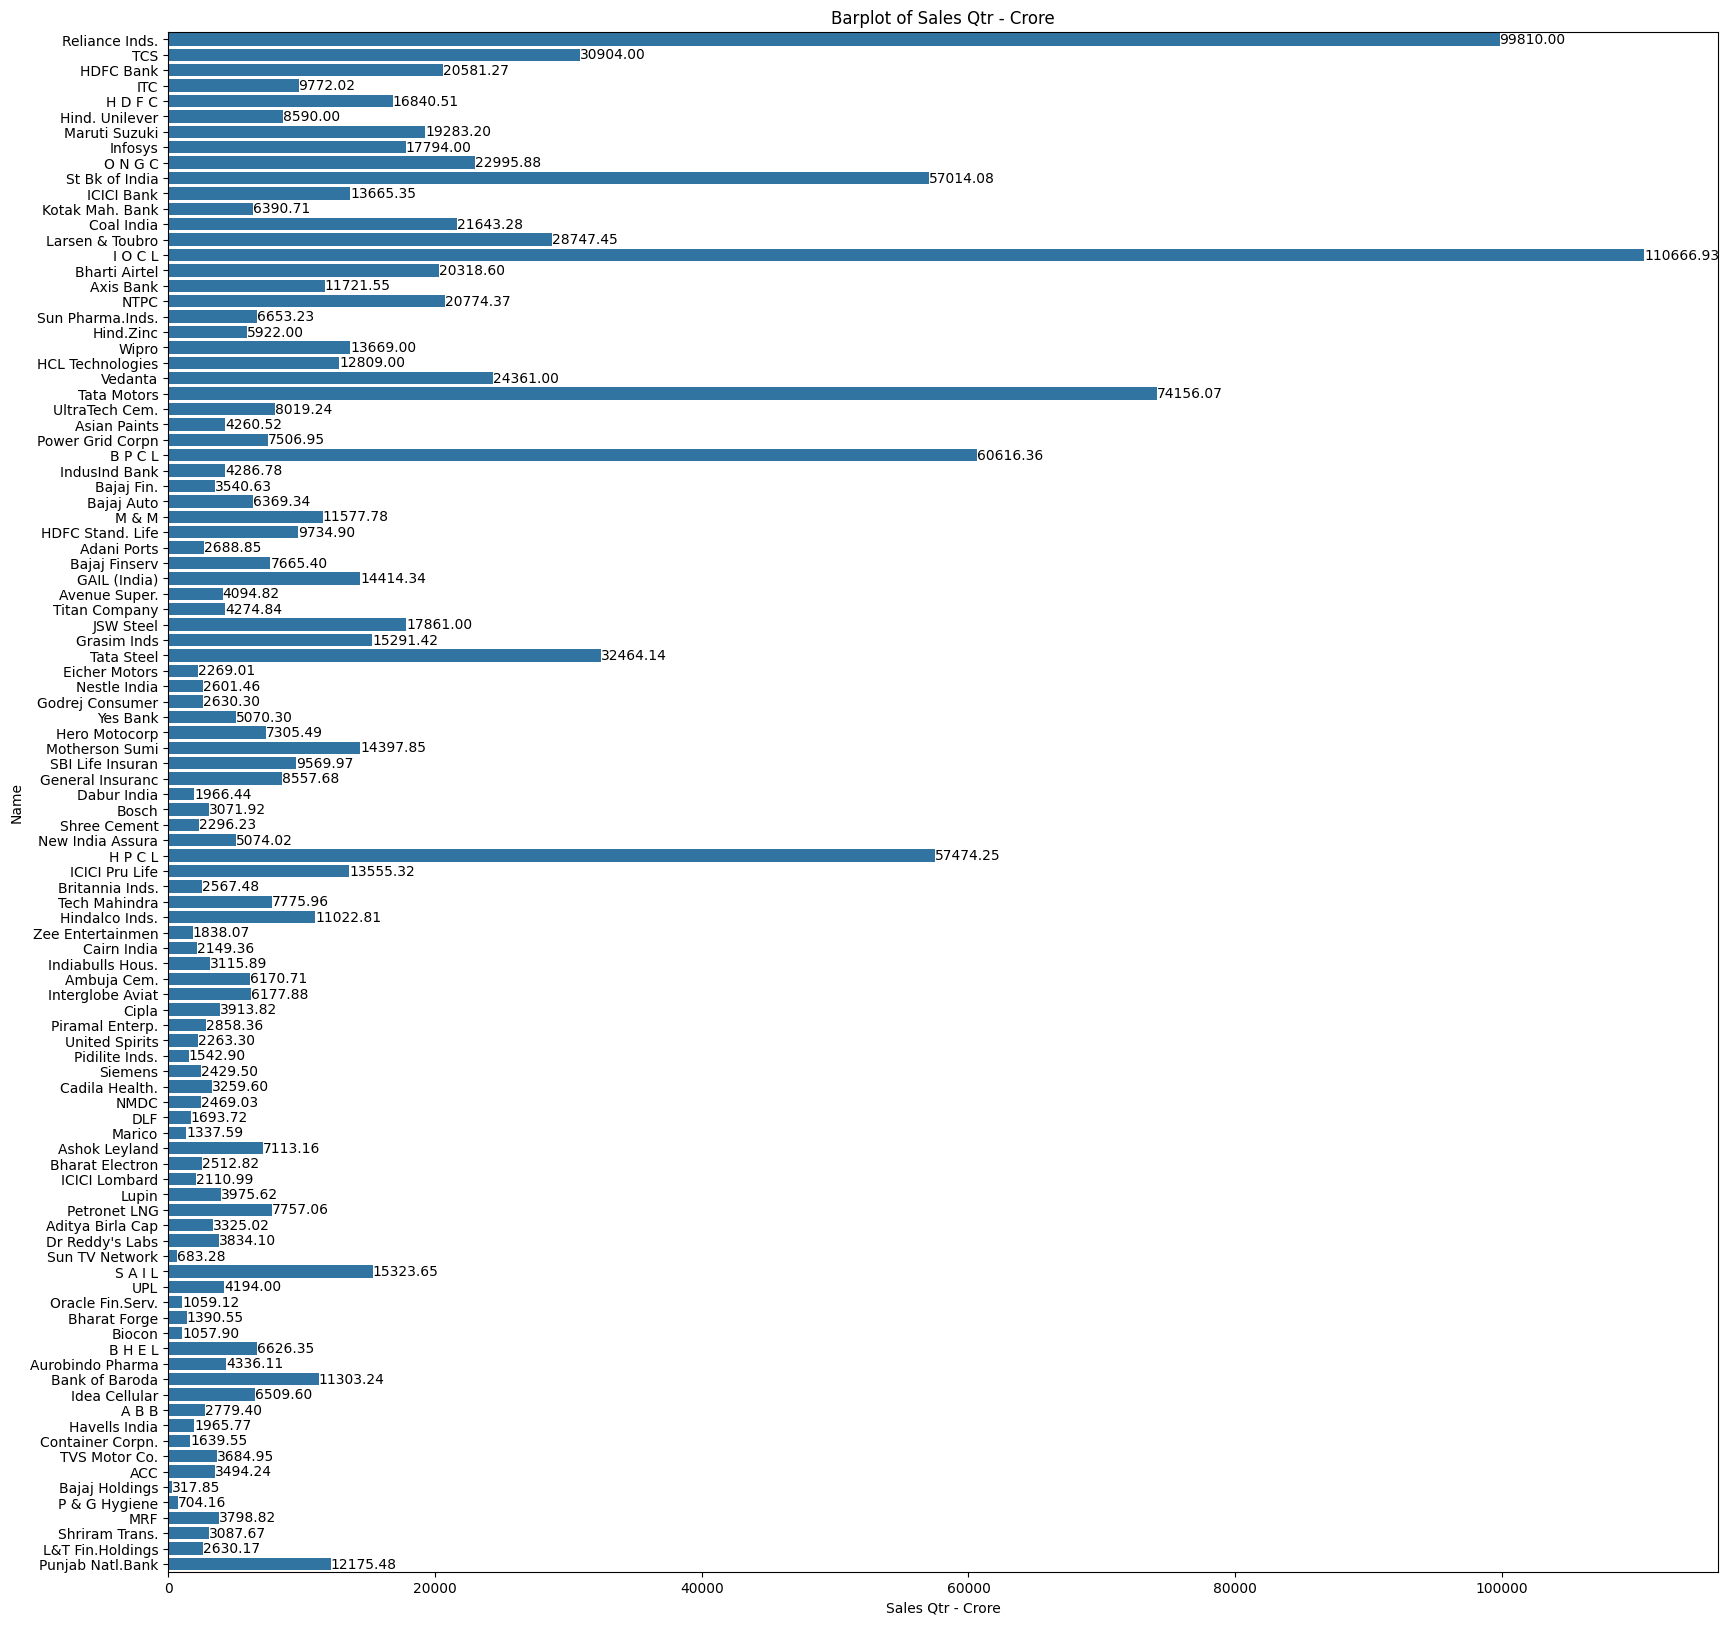

In [8]:
plt.figure(figsize=(20,20))
sns.barplot(x='Sales Qtr - Crore', y='Name', data=df2)
plt.title('Barplot of Sales Qtr - Crore')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Name')

for index, value in enumerate(df2['Sales Qtr - Crore']):
    plt.text(value, index, f'{value:.2f}', color='black', va='center')
plt.show()

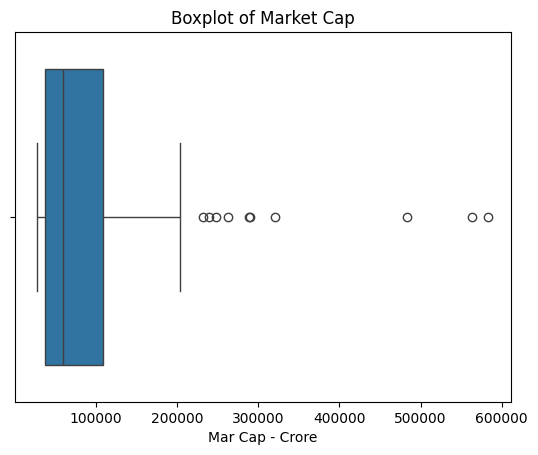

In [9]:
sns.boxplot(x=df2['Mar Cap - Crore'])
plt.title('Boxplot of Market Cap')
plt.show()

### Correlation

In [10]:
corr=df[['Mar Cap - Crore','Sales Qtr - Crore']].corr()
corr

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.624409
Sales Qtr - Crore,0.624409,1.000000


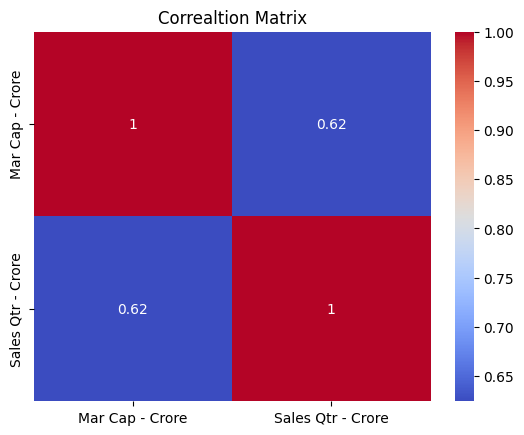

In [11]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correaltion Matrix')
plt.show()

## ML Algorithms

### Linear Regression for Market Cap

Mean Squared Error: 2287587587.68
R-squared: 0.56


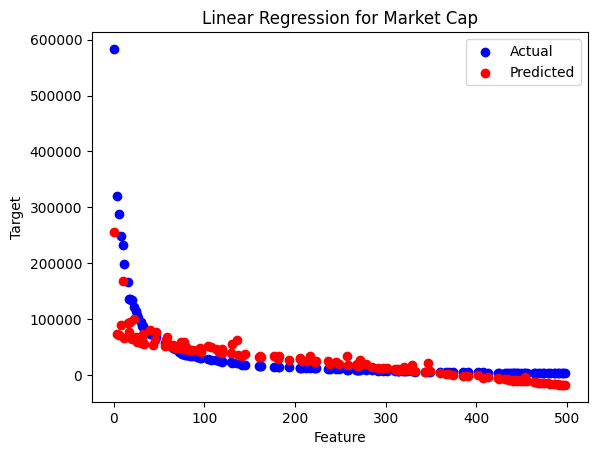

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.get_dummies(df)
X = df.drop('Mar Cap - Crore', axis=1)  
y = df['Mar Cap - Crore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression for Market Cap')
plt.legend()
plt.show()

### Linear Regression for Quaterly Sales

Mean Squared Error: 44338763.13
R-squared: 0.59


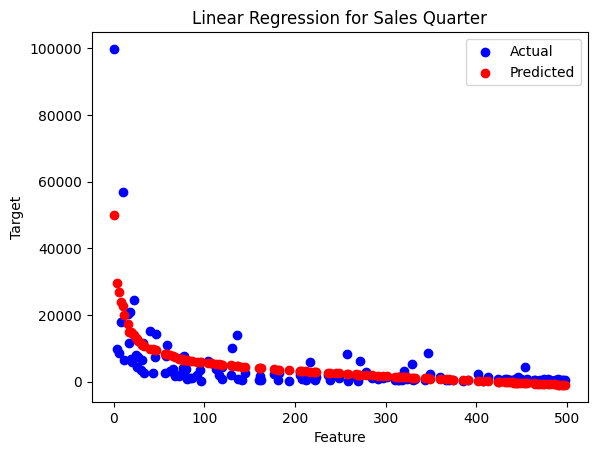

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.get_dummies(df)
X = df.drop('Sales Qtr - Crore', axis=1)  
y = df['Sales Qtr - Crore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression for Sales Quarter')
plt.legend()
plt.show()